In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
# Set dataset path
dataset_path = "train"
img_height = 64
img_width = 64

In [5]:
# Load and preprocess images using OpenCV
def load_images(dataset_path):
    images = []
    labels = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_height, img_width))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                images.append(img)
                labels.append(folder)
    return np.array(images), np.array(labels)

In [9]:
images, labels = load_images(dataset_path)
images = images.reshape((images.shape[0], -1))  # Flatten images

In [10]:
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [11]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)


In [12]:
# Train an SVM classifier
classifier = SVC(kernel='linear', probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [13]:
# Predict on the test set
y_pred = classifier.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [15]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.954172696575012
Classification Report:
              precision    recall  f1-score   support

    legitime       0.76      0.15      0.25       106
     malwars       0.96      1.00      0.98      1967

    accuracy                           0.95      2073
   macro avg       0.86      0.57      0.61      2073
weighted avg       0.95      0.95      0.94      2073



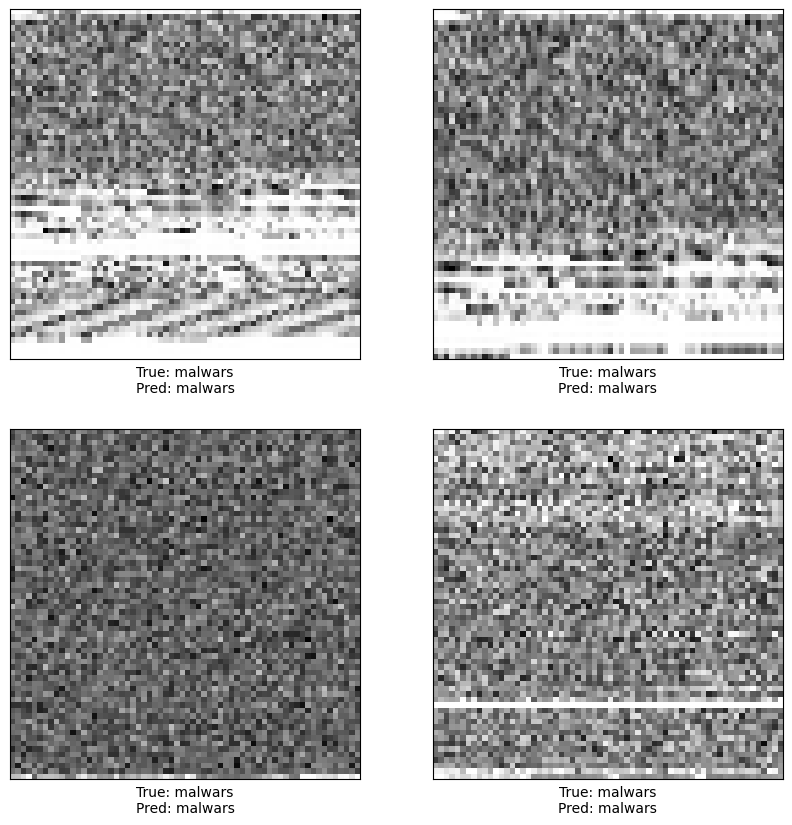

In [16]:
def plot_images(images, labels, preds, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(img_height, img_width), cmap=plt.cm.binary)
        plt.xlabel(f"True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}")
    plt.show()

plot_images(X_test.reshape(-1, img_height, img_width), y_test, y_pred, label_encoder.classes_)

In [ ]:
import pickle

# Sauvegarder le modèle SVM
with open('classifier-SVM.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [ ]:
def preprocess_image(image_path, img_height, img_width):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_height, img_width))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = img.reshape(1, -1)  # Flatten image
    return img

# Define the path to your image
image_path = "train/Adposhel/0a24389a91af0d2a5c843b85bae2eefde0995166resized_image.png"

# Preprocess the image
preprocessed_image = preprocess_image(image_path, img_height, img_width)

# Standardize the image
preprocessed_image = scaler.transform(preprocessed_image)

# Predict the class of the image
predicted_class_index = classifier.predict(preprocessed_image)[0]

# Decode the predicted class index
predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

print(f"The predicted class of the image is: {predicted_class}")

In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)